# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [1]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, score_classif_time, get_dataset_info, get_loader
from HOTS.network import network
import tonic #, os

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (32,32)
max_duration = 1e3
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_cla = 200*patch_size[0]*patch_size[1]*2

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


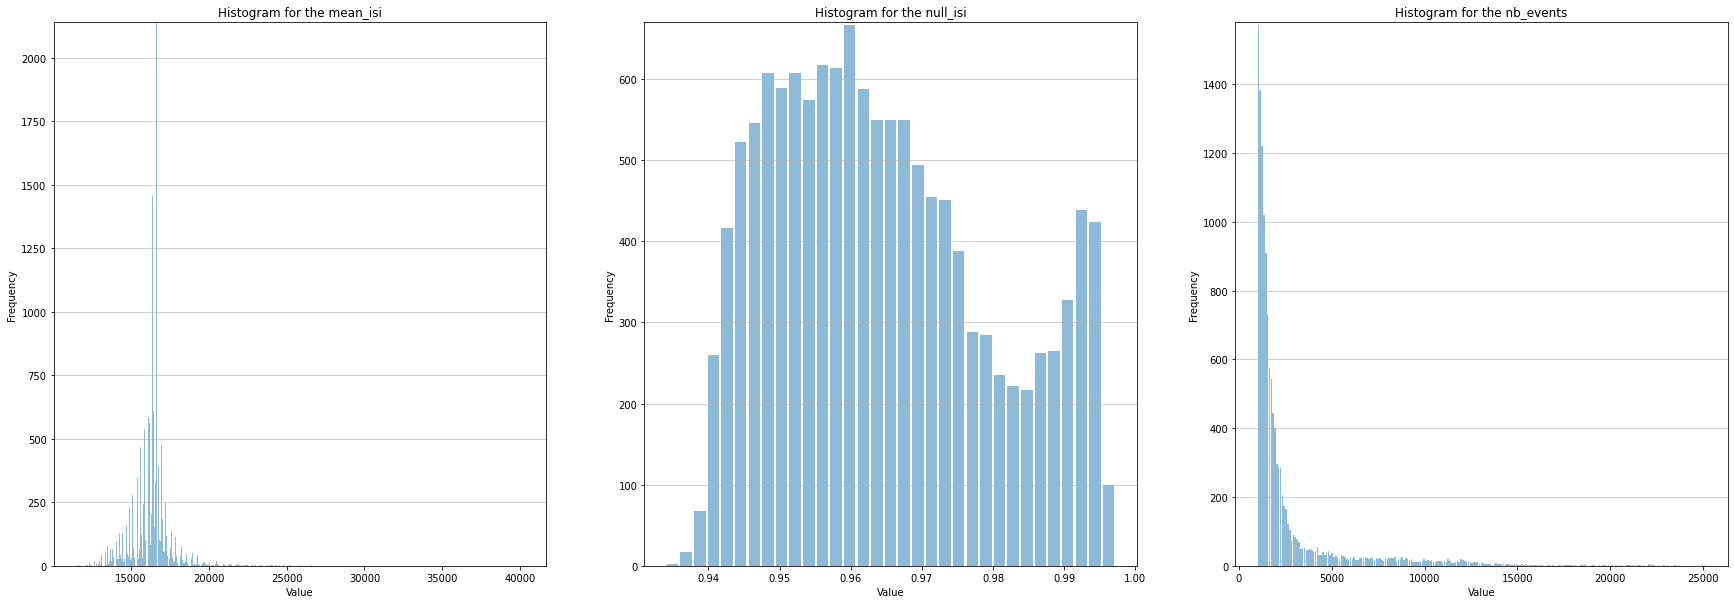

In [2]:
values = get_dataset_info(trainset, testset)

number of samples in the trainset: 8528
number of samples in the testset: 4663
----------------------------------------
number of samples in each class for the trainset: [4788. 3740.]
number of samples in each class for the testset: [3444. 1219.]
----------------------------------------


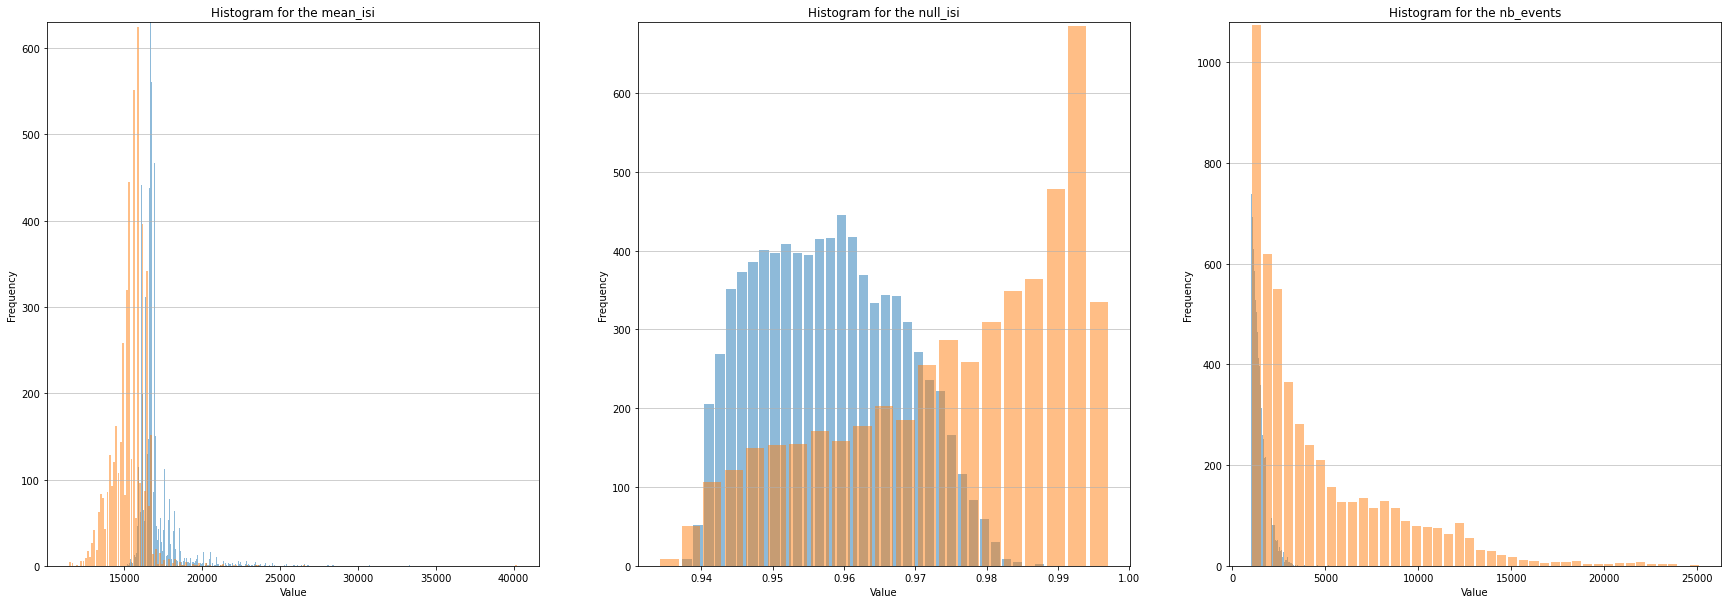

In [3]:
values = get_dataset_info(trainset, testset, distinguish_labels=True)

## Classification with MLR on raw events

In [4]:
kfold = 10
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

../Records/models/2022-01-03_RAW_409600_(32, 32)_10_LR.pkl
load existing model


In [5]:
likelihood, true_target, timestamps = predict_data(path, date, tau_cla, patch_size=patch_size, max_duration = max_duration, kfold=kfold)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [00:55<00:00,  8.41it/s]


Mean accuracy: 77.7%


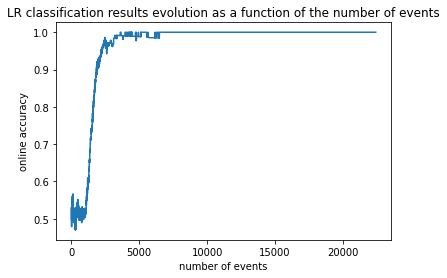

In [6]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

Mean accuracy: 80.2%


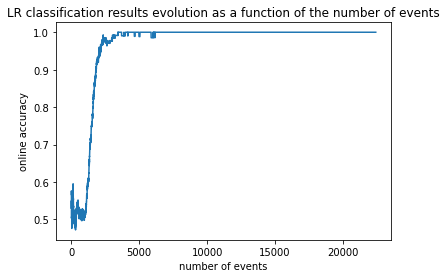

In [7]:
likelihood_threshold = .9
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=likelihood_threshold)

  0%|                                                                                                                                                        | 0/466 [00:00<?, ?it/s]/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/INT/grimaldi.a/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [29:46<00:00,  3.83s/it]
/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS/tools.py:413: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


Mean accuracy: 59.0%


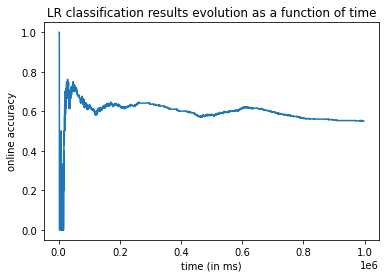

In [8]:
timestep = 1e4 # 1ms
meanac, onlinac, lastac, truepos, falsepos = score_classif_time(likelihood, true_target, timestamps, timestep= timestep)